___

# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor we would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower. A FICO score is the number used to determine someone’s creditworthiness.
* days.with.cr.line: The number of days the borrower has had a credit line. A credit line is a type of loan that allows you to borrow and repay money, usually on a revolving basis.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Import Libraries

In [55]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

## Get the Data

In [56]:
loans = pd.read_csv('data/loan_data.csv')

Checking out the info(), head(), and describe() of the loans dataset: 

In [57]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


The **not.fully.paid** column represents whether or not the loan was fully paid back or not. That will be the categorical feature we'll try to predict using a Decision Tree and then a Random Forest machine learning model.

In [58]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [59]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

## Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities.

Let's start creating a histogram of two **FICO** distributions on top of each other, one for each **credit.policy** outcome.

<AxesSubplot: xlabel='fico', ylabel='Count'>

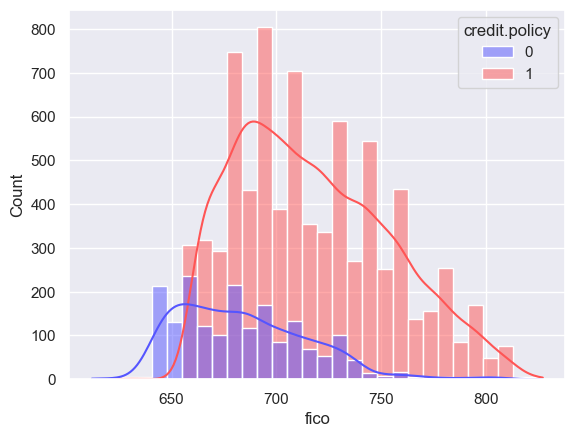

In [60]:
sns.histplot(loans, x='fico', hue='credit.policy', kde=True, palette='seismic', bins=30)

We now create a similar figure, except this time select by the **not.fully.paid** column.

<AxesSubplot: xlabel='fico', ylabel='Count'>

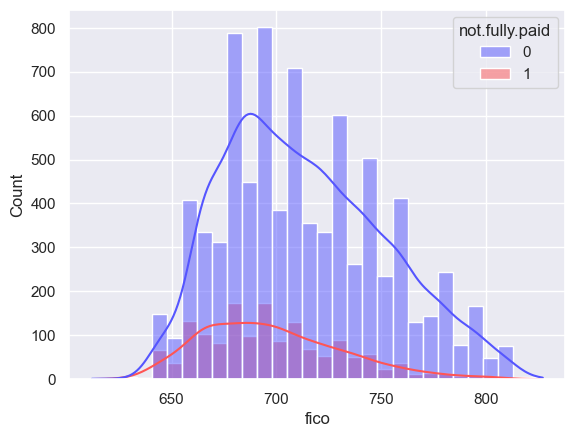

In [61]:
sns.histplot(loans, x='fico', hue='not.fully.paid',
             kde=True, palette='seismic', bins=30)


Let's visualize a countplot showing the counts of loans by purpose, with the color hue defined by **not.fully.paid**.

<AxesSubplot: xlabel='purpose', ylabel='count'>

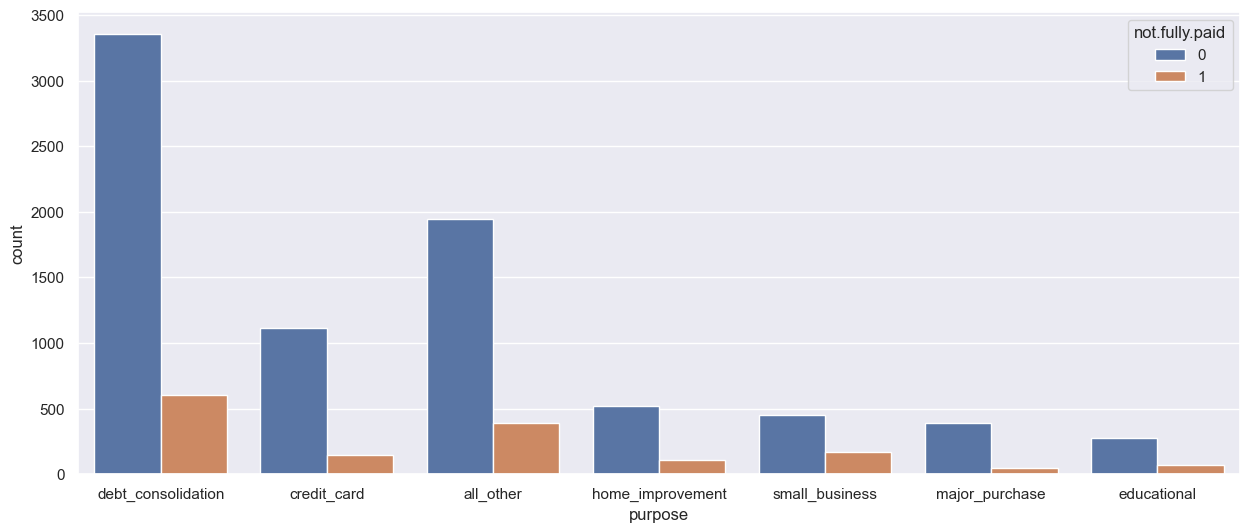

In [62]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.countplot(loans, ax=ax, x='purpose', hue='not.fully.paid')

What we can start to notice is the inbalancing of the target variable: there are way more people who actually fully paid their loans, rather then the ones who don't do it.

Let's now see the trend between **FICO score** and **interest rate**, by creating a jointplot.

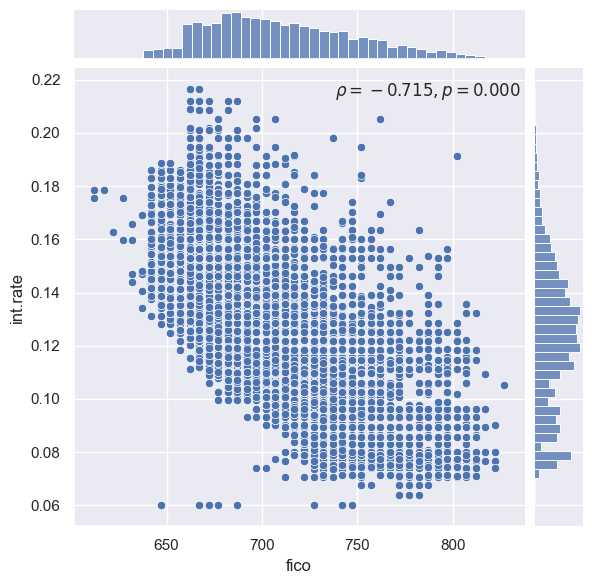

In [63]:
g = sns.jointplot(loans, x='fico', y='int.rate',  height=6, ratio=8)
r, p = stats.pearsonr(loans['fico'], loans['int.rate'])
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.579, 0.95), xycoords='axes fraction',
                    ha='left', va='center')
plt.show()

A very relatively high negative correlation and this does make sense: a riskier borrower is associated with a *high interest rate*, and due to the lack of to trust also to a *low FICO score*.  

Let's conclude our EDA by creating an lmplots to see if the above trend differed between **not.fully.paid** and **credit.policy**.

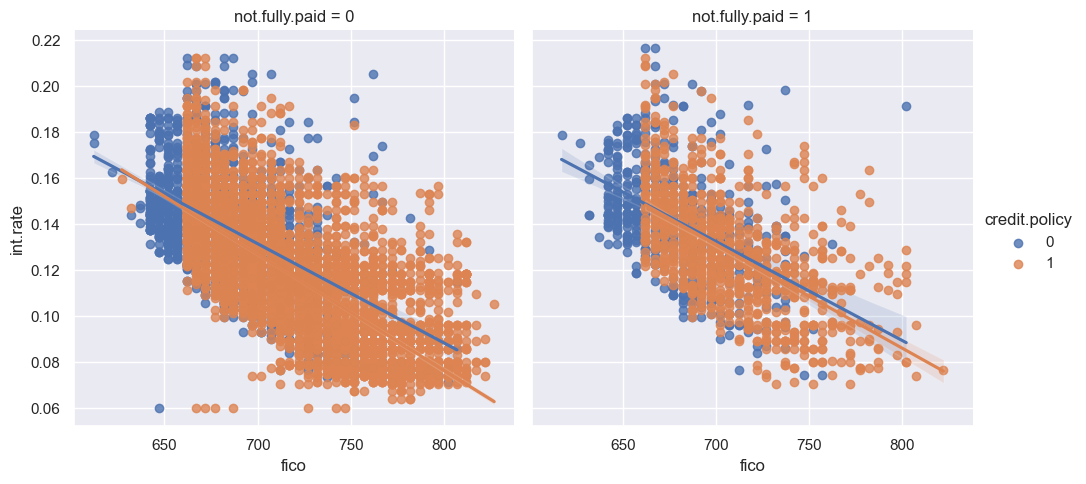

In [64]:
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid')

## Data preprocessing

Let's get ready to set up our data for our Random Forest Classification Model!

Recalling the dataset infos:

In [65]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Categorical Features

Notice that the **purpose** column is categorical.

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this using a OneHotEncoder.

In [78]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc_features = enc.fit_transform(loans[['purpose']])
enc_features = pd.DataFrame(enc_features.toarray(), columns=enc.categories_[0].tolist())
enc_features = enc_features.astype("int")

loans = loans.merge(enc_features, left_index=True, right_index=True).drop('purpose', axis=1)
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   credit.policy         9578 non-null   int64  
 1   int.rate              9578 non-null   float64
 2   installment           9578 non-null   float64
 3   log.annual.inc        9578 non-null   float64
 4   dti                   9578 non-null   float64
 5   fico                  9578 non-null   int64  
 6   days.with.cr.line     9578 non-null   float64
 7   revol.bal             9578 non-null   int64  
 8   revol.util            9578 non-null   float64
 9   inq.last.6mths        9578 non-null   int64  
 10  delinq.2yrs           9578 non-null   int64  
 11  pub.rec               9578 non-null   int64  
 12  not.fully.paid        9578 non-null   int64  
 13  all_other_x           9578 non-null   int32  
 14  credit_card_x         9578 non-null   int32  
 15  debt_consolidation_x 

### Splitting the dataset

To prepare for the next section, we also split our data into a training set and a testing set!

In [73]:
from sklearn.model_selection import train_test_split

In [79]:
X = loans.drop('not.fully.paid', axis=1)
y = loans['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

## Training and predicting with a Decision Tree Model

It's time to create our models!

Let's start by training a single decision tree first.

In [80]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of *DecisionTreeClassifier()* called *dtree* and fit it to the training data.

In [81]:
dt = DecisionTreeClassifier()

In [82]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

Let's create predictions from the test set. Then we'll visualize a classification report and a confusion matrix to evaluate the performance.

In [84]:
preds = dt.predict(X_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2410
           1       0.23      0.26      0.25       464

    accuracy                           0.74      2874
   macro avg       0.54      0.55      0.54      2874
weighted avg       0.75      0.74      0.75      2874



In [101]:
print(confusion_matrix(y_test, preds))

[[2001  409]
 [ 342  122]]


As we can see in the precision and recall metrics, the performance in class "1" is really poor. The reason behind that is especially for the target variable inbalance of the dataset.

### Tree Visualization

In [100]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                feature_names=list(X.columns), filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


## Training and predicting with a Random Forest model

Now it's time to train a Random Forest model instead!

Let's create an instance of the RandomForestClassifier class, fitting it to our training data from the previous step.

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

### Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

We start by predicting the class of **not.fully.paid** for the X_test data.

In [104]:
preds = rfc.predict(X_test)

And now, as for the previous decision tree model, we create a classification report and a confusion matrix from the results.

In [105]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2410
           1       0.36      0.02      0.04       464

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



In [106]:
print(confusion_matrix(y_test, preds))

[[2394   16]
 [ 455    9]]


The major evidence is how much the Random Forest classifier highlight the data inbalance, given the even lower metrics for class "1"!

## Conclusion

To conclude, let's answer a key question of the project: **which model performed better, the random forest or the decision tree?**

Given a much higher accuracy the random forest gives us better performance. But since the target label was inbalanced, accuracy is metric not always a reliable value.  

Although, choose among various models also depends on which class we are interested the most. For example, for the "class 1" the decision tree has higher metrics.